# <center>KNN 

#### KNN works on the eucladian distance formulae <br>
K stands for a positive integer >1(greater than 1) <br>
K is the value as in the number of nearest neignbour <br>
KNN is a binary and multi class classification technique<br>



### When to use KNN to classify your data
1) DataSet Should be numeric <br>
2) DataSet should be on the lower side i.e well suited for small dataset<br>
3) Unit of Measure(UoM) :- Standardization of data should be done (transforming data into a fixed range)<br>
    Fixed Range formulae :- 1)MinMax 2)Z-score 3)Sigmoid(not recommended)<br>
4) There are no assumptions w.r.t data 

#### Min Max = x<sub>i</sub> - min(age) / max(age)-min(age)

#### Z-score  = x<sub>i</sub>- μ (average of obvs) / σ (std. deviation of obvs)

In [39]:
#Importing libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing #used for data transformation

In [3]:
filename = 'wheat.csv'

In [4]:
wheat = pd.read_csv(filename)

In [5]:
wheat.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
wheat.isna().sum()

area             0
perimeter        0
compactness      0
kernel_len       0
kernel_width     0
asym_coeff       0
kernel_groove    0
type             0
dtype: int64

In [8]:
#Check the dimensions 
wheat.shape

(210, 8)

In [9]:
wheat.dtypes

area             float64
perimeter        float64
compactness      float64
kernel_len       float64
kernel_width     float64
asym_coeff       float64
kernel_groove    float64
type               int64
dtype: object

In [10]:
#Distribution of class
wheat.type.value_counts()

1    70
2    70
3    70
Name: type, dtype: int64

In [11]:
#data Transformation 
wheat_tr = wheat.copy() # First make a copy of dataset then transform

In [12]:
#Standard Scaler

#Creating a instance of Standard Scaler 
ss = preprocessing.StandardScaler()

In [13]:
tr_data = ss.fit_transform(wheat_tr.iloc[:,:])

In [14]:
wheat_tr.iloc[:,:] = tr_data

In [15]:
#difference btwn actual and transformde data
wheat.head()
wheat_tr.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745


In [16]:
#Set y variable to its orignal format 
wheat_tr.type = wheat.type

In [18]:
wheat_tr.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1


In [24]:
#Shuffle the data 
wheat_tr = wheat_tr.sample(frac=1 )

In [25]:
wheat_tr.head(20)

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
124,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2
42,-0.581351,-0.774678,1.268456,-1.109786,-0.152873,-0.826149,-1.274852,1
170,-1.318579,-1.196831,-2.210087,-0.686716,-1.479788,2.023236,-0.499831,3
40,-0.450441,-0.544413,0.683043,-0.634680,-0.272295,-0.742147,-0.469238,1
198,-0.767380,-0.682572,-0.971386,-0.494411,-0.922484,-0.262805,-0.361143,3
174,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,3
127,1.079136,0.990689,1.200582,0.792898,1.136888,-0.962151,1.042054,2
90,1.809475,1.865696,0.152777,2.154866,1.396963,-1.163488,2.123006,2
179,-0.908625,-0.836082,-1.090166,-0.614319,-0.970252,-1.359492,-0.469238,3
164,-1.277239,-1.358016,-0.644742,-1.397111,-1.232982,1.791898,-0.732337,3


In [26]:
#Split the data in train and test
trainx,testx,trainy,testy = train_test_split(wheat_tr.drop('type',1),
                                            wheat_tr.type,
                                            test_size=0.25)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_5828/490317040.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainy,testy = train_test_split(wheat_tr.drop('type',1),


In [27]:
(trainx.shape,trainy.shape)

((157, 7), (157,))

In [28]:
(testx.shape,testy.shape)

((53, 7), (53,))

In [29]:
# Determine the best value for K
lst_k = np.arange(3,12,2);lst_k

array([ 3,  5,  7,  9, 11])

In [30]:
#Store accuracy value for every K.The maximum accuracy = value of K
cv_accuracy = []

In [31]:
for k in lst_k:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,trainx,trainy,cv =10 , scoring='accuracy')
    cv_accuracy.append(scores.mean())
    

In [32]:
print(cv_accuracy)

[0.9433333333333334, 0.9308333333333334, 0.9308333333333334, 0.9245833333333333, 0.9241666666666667]


In [78]:
#Find the best K
#(1)Using The list properties
k = lst_k[cv_accuracy.index(max(cv_accuracy))]
print("Best K = "+str(k))

Best K = 3


Text(0, 0.5, 'K values')

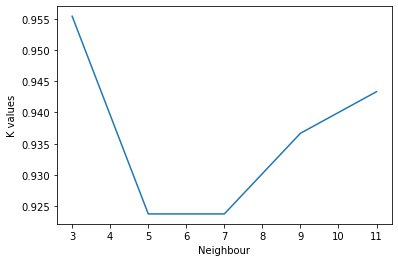

In [79]:
#(2)Plot the accuracy vs K values
plt.plot(lst_k,cv_accuracy)
plt.xlabel("Neighbour")
plt.ylabel("K values")

In [80]:
#build model and predcit using the best k 
m1 = neighbors.KNeighborsClassifier(n_neighbors=k).fit(trainx,trainy)

In [81]:
print(m1)

KNeighborsClassifier(n_neighbors=3)


In [82]:
#In above model the default model is Euclidean Distance formulae
#To change the formulae use HP  "metric"
m1 = neighbors.KNeighborsClassifier(n_neighbors=k,metric="euclidean").fit(trainx,trainy)

In [83]:
#predict 
p1 = m1.predict(testx)

In [84]:
#create data frame to store the result and print the confusion matrix
df = pd.DataFrame({'actual' : testy,'predicted':p1})

pd.crosstab(df.actual,df.predicted,margins = True)

predicted,1,2,3,All
actual,,,,
1,19,0,2,21
2,1,20,0,21
3,1,0,10,11
All,21,20,12,53


In [85]:
#Accuracy
print("Model Accuracy = {}".format(accuracy_score(df.actual,df.predicted)))

Model Accuracy = 0.9245283018867925


In [86]:
#Classification Report
print(classification_report(df.actual,df.predicted))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       1.00      0.95      0.98        21
           3       0.83      0.91      0.87        11

    accuracy                           0.92        53
   macro avg       0.91      0.92      0.92        53
weighted avg       0.93      0.92      0.93        53



In [54]:
#Class Exercise 
#1)Build model using minmax scaler
#2) build on orignal data set 


In [55]:
ms = preprocessing.MinMaxScaler()

In [56]:
tr_data = ms.fit_transform(wheat_tr.iloc[:,:])

In [57]:
wheat_tr.iloc[:,:] = tr_data

In [58]:
#difference btwn actual and transformde data
wheat.head()
wheat_tr.head()

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
124,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730,0.5
42,0.242682,0.235537,0.842105,0.134572,0.406985,0.220507,0.129985,0.0
170,0.040604,0.121901,0.098004,0.239865,0.050606,0.776229,0.317085,1.0
40,0.278565,0.297521,0.716878,0.252815,0.374911,0.236890,0.324471,0.0
198,0.191690,0.260331,0.362976,0.287725,0.200285,0.330377,0.350566,1.0


In [59]:
#Set y variable to its orignal format 
wheat_tr.type = wheat.type

In [60]:
#Shuffle the data 
wheat_tr = wheat_tr.sample(frac=1 )

In [61]:
#Split the data in train and test
trainx,testx,trainy,testy = train_test_split(wheat_tr.drop('type',1),
                                            wheat_tr.type,
                                            test_size=0.25)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_5828/490317040.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainy,testy = train_test_split(wheat_tr.drop('type',1),


In [62]:
# Determine the best value for K
lst_k = np.arange(3,12,2);lst_k

array([ 3,  5,  7,  9, 11])

In [63]:
cv_accuracy = []

In [64]:
for k in lst_k:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,trainx,trainy,cv =10 , scoring='accuracy')
    cv_accuracy.append(scores.mean())
    

In [65]:
print(cv_accuracy)

[0.9554166666666667, 0.9237500000000001, 0.9237500000000001, 0.9366666666666668, 0.9433333333333334]


In [66]:
#Find the best K
#(1)Using The list properties
k = lst_k[cv_accuracy.index(max(cv_accuracy))]
print("Best K = "+str(k))

Best K = 3


Text(0, 0.5, 'K values')

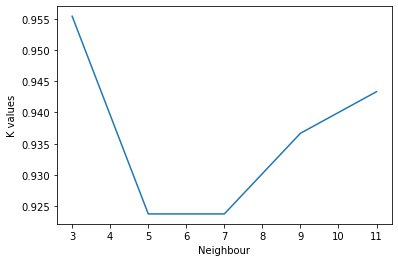

In [67]:
#(2)Plot the accuracy vs K values
plt.plot(lst_k,cv_accuracy)
plt.xlabel("Neighbour")
plt.ylabel("K values")

In [68]:
#build model and predcit using the best k 
m1 = neighbors.KNeighborsClassifier(n_neighbors=k).fit(trainx,trainy)


In [69]:
print(m1)

KNeighborsClassifier(n_neighbors=3)


In [70]:
#In above model the default model is Euclidean Distance formulae
#To change the formulae use HP  "metric"
m1 = neighbors.KNeighborsClassifier(n_neighbors=k,metric="euclidean").fit(trainx,trainy)

In [71]:
#predict 
pre1 = m1.predict(testx)

In [93]:
#create data frame to store the result and print the confusion matrix
df_mimx = pd.DataFrame({'actual' : testy,'predicted_mimx':pre1})

pd.crosstab(df_mimx.actual,df_mimx.predicted_mimx,margins = True)

predicted_mimx,1,2,3,All
actual,,,,
1,19,0,2,21
2,1,20,0,21
3,1,0,10,11
All,21,20,12,53


In [95]:
#Accuracy
print("Model Accuracy = {}".format(accuracy_score(df_mimx.actual,df_mimx.predicted_mimx)))

Model Accuracy = 0.9245283018867925


In [74]:
#Classification Report
print(classification_report(df.actual,df.predicted))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       1.00      0.95      0.98        21
           3       0.83      0.91      0.87        11

    accuracy                           0.92        53
   macro avg       0.91      0.92      0.92        53
weighted avg       0.93      0.92      0.93        53



In [96]:
df_= pd.DataFrame({'StandardScaler Accuracy':accuracy_score(df.actual,df.predicted_mimx),
                  'MinmaxScaler Accuracy ':accuracy_score(df_mimx.actual,df_mimx.predicted_mimx)})

AttributeError: 'DataFrame' object has no attribute 'predicted_mimx'